<a href="https://colab.research.google.com/github/MukeshMishraReloaded/Intro-to-ML-models/blob/main/titas_Problems_May27_LR2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/drive/1CY6V5VXY427odTEXmTerQ6Y3fZTKKGJm?usp=sharing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!gdown 1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh

Downloading...
From: https://drive.google.com/uc?id=1UpLnYA48Vy_lGUMMLG-uQE1gf_Je12Lh
To: /content/cars24-car-price-clean.csv
100% 7.10M/7.10M [00:00<00:00, 24.0MB/s]


In [ ]:
df = pd.read_csv('cars24-car-price-clean.csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,-1.111046,-0.801317,1.195828,0.045745,-1.310754,-1.157780,0.801317,-0.433854,-1.125683,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
1,-0.223944,0.450030,-0.737872,-0.140402,-0.537456,-0.360203,-0.450030,-0.327501,-0.333227,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
2,-0.915058,-1.426990,0.035608,-0.582501,-0.537456,-0.404885,1.426990,-0.327501,-0.789807,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
3,-0.892365,-0.801317,-0.409143,0.329620,-0.921213,-0.693085,0.801317,-0.433854,-0.905265,1.248892,-0.098382,-0.985275,-0.020095,-0.056917,1.024622,0.495818,0.444503,-0.424728
4,-0.182683,0.137194,-0.544502,0.760085,0.042999,0.010435,-0.137194,-0.246579,-0.013096,-0.800710,-0.098382,1.014945,-0.020095,-0.056917,-0.975970,0.495818,0.444503,-0.424728


In [ ]:
# define X and y
X = df["model"].values
Y = df["selling_price"].values

In [ ]:
print(X.shape)
print(Y.shape)

(19820,)
(19820,)


In [ ]:
def r2_score(Y,Y_hat): # Y is actual values, Y_hat is predicted values
    num = np.sum((Y-Y_hat)**2)
    denom = np.sum((Y- Y.mean())**2)
    score = (1 - num/denom)
    return score

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
model.fit(X,Y)

ValueError: ignored

In [ ]:
X = X.reshape(X.shape[0],1)
Y = Y.reshape(Y.shape[0],1)
print(X.shape)
print(Y.shape)

(19820, 1)
(19820, 1)


In [ ]:
model.fit(X,Y)

LinearRegression()

In [ ]:
print(model.coef_) # w1
print(model.intercept_) # w0

[[0.96505112]]
[-1.18731936e-16]


In [ ]:
y_hat = model.predict(X)
print(y_hat.shape)

(19820, 1)


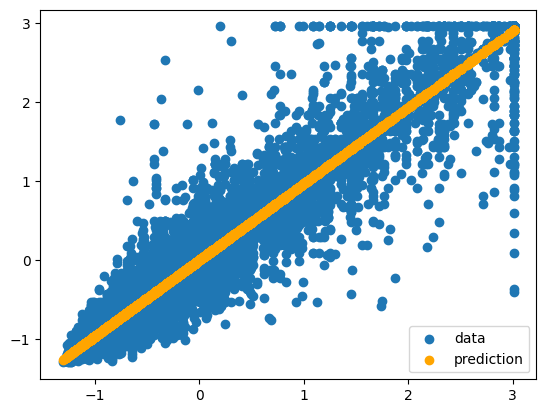

In [ ]:
fig = plt.figure()
plt.scatter(X,Y,label='data')
plt.scatter(X,y_hat,color='orange',label='prediction')
plt.legend()
plt.show()

In [ ]:
model.score(X,Y)

0.9313236629576508

In [ ]:
X = df[df.columns.drop('selling_price')]
Y = df["selling_price"]
X = X.to_numpy()
Y = Y.to_numpy()
print(X.shape)
print(Y.shape)

(19820, 17)
(19820,)


In [ ]:
ones = np.ones((X.shape[0],1)) # N x 1 matrix
X = np.hstack((ones,X))
print(X.shape)

(19820, 18)


In [ ]:
def hypothesis(X,weight):
    return np.dot(X,weight) # X -> 19820 x 18, weight -> 18 x 1

    # matrix multiplication accordingly

In [ ]:
def error(X,y,weight): # X, y, weights --> MSE error
    e = 0.0
    m = X.shape[0]
    y_hat = hypothesis(X,weight) # X -> 19820 x 18 matrix, y -> 19820 x 1 matrix, y_hat -> 19820 x 1 matrix
    e = np.sum((y-y_hat)**2)
    return e/m

In [ ]:
def gradient(X,y,weight):
    y_hat = hypothesis(X,weight)
    grad = np.dot(X.T,(y_hat - y))
    m = X.shape[0]
    return grad/m

In [ ]:
def gradient_descent(X,y,learning_rate = 0.1,epochs=500):

    n = X.shape[1]
    weight = np.zeros((n,))
    error_list = []

    for i in range(epochs):
        e = error(X,y,weight)
        error_list.append(e)

        # Batch Gradient descent
        grad = gradient(X,y,weight)
        weight = weight - learning_rate*grad

    return weight, error_list

In [ ]:
import time
start = time.time()
weight, error_list = gradient_descent(X,Y, learning_rate=0.1, epochs=500)
end = time.time()
print("Time taken is ", end-start)

Time taken is  0.1271662712097168


In [ ]:
print(weight)
print(weight.shape)

[-7.18788186e-17  6.49606223e-02 -1.82895655e-02 -4.83430286e-02
  3.02408637e-02  2.89670964e-02 -6.49606223e-02  6.15011893e-02
  7.92870481e-01 -1.69511557e-02 -3.43943374e-03  1.56662107e-02
  1.28017113e-02  3.01544203e-03 -2.09812350e-02 -1.31123716e-02
 -1.88085889e-02 -2.61485794e-02]
(18,)


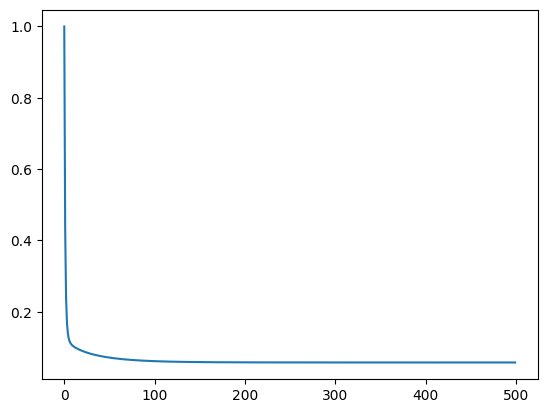

In [ ]:
fig = plt.figure()
plt.plot(error_list)
plt.show()

In [ ]:
print(error_list[0])
print(error_list[-1])

1.0
0.05781477946502769


In [ ]:
Y_hat = hypothesis(X,weight)

In [ ]:
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score

In [ ]:
r2_score(Y,Y_hat)

0.9421852544960344